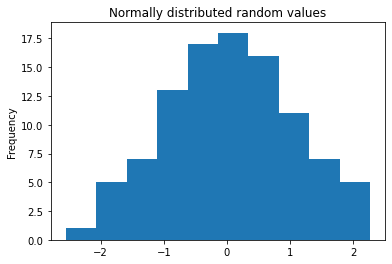

In [1]:
import pandas as pd # This is always assumed but is included here as an introduction.
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
values = np.random.randn(100) # array of normally distributed random numbers
s = pd.Series(values) # generate a pandas series
s.plot(kind='hist', title='Normally distributed random values') # hist computes distribution
plt.show()

In [2]:
s.describe()

count    100.000000
mean       0.059808
std        1.012960
min       -2.552990
25%       -0.643857
50%        0.094096
75%        0.737077
max        2.269755
dtype: float64

In [5]:
#Descriptive statistics
df = pd.DataFrame({'A': [1, 2, 1, 4, 3, 5, 2, 3, 4, 1],
 'B': [12, 14, 11, 16, 18, 18, 22, 13, 21, 17],
 'C': ['a', 'a', 'b', 'a', 'b', 'c', 'b', 'a', 'b', 'a']})
df.describe()
## since C is not a numerical column, it is excluded from the output

,A,B
count,10.000000,10.000000
mean,2.600000,16.200000
std,1.429841,3.705851
min,1.000000,11.000000
25%,1.250000,13.250000
50%,2.500000,16.500000
75%,3.750000,18.000000
max,5.000000,22.000000


In [6]:
 df['C'].describe()

count     10
unique     3
top        a
freq       5
Name: C, dtype: object

In [17]:
#Appending rows
df = pd.DataFrame(columns = ['A', 'B', 'C'])
df
#Appending a row by a single column value
df.loc[0, 'A'] = 1
df
#Appending a row, given list of values:
df.loc[1] = [2, 3, 4]
df
#Appending a row given a dictionary
df.loc[2] = {'A': 3, 'C': 9, 'B': 9}
df
#overwrite values
df.loc[1] = [5, 6, 7]
df
df.loc[0, 'B'] = 8
df

,A,B,C
0,1,8,NaN
1,5,6,7
2,3,9,9


In [20]:
#Append a DataFrame to another DataFrame
df1 = pd.DataFrame({'A': ['a1', 'a2'],
 'B': ['b1','b2'],
 })
df1
df2= pd.DataFrame({
 'B': ['b1']
 })
df2
df1.append(df2)

,A,B
0,a1,b1
1,a2,b2
0,NaN,b1


In [21]:
df1.append(df2, ignore_index = True)

,A,B
0,a1,b1
1,a2,b2
2,NaN,b1


In [37]:
#Boolean indexing of dataframes
df = pd.DataFrame({"color": ['red', 'blue', 'red', 'blue']},
index=[True, False, True, False])
df
#Accessing with .loc
df.loc[True]
#Accessing with .iloc
#df.iloc[True]
df.iloc[1]
#Important to note is that older pandas versions did not distinguish between boolean
#and integer input, thus .iloc[True] would return the same as .iloc[1]

color    blue
dtype: object

In [38]:
#Applying a boolean mask to a dataframe
df = pd.DataFrame({'Color': ['Red', 'Blue', 'Red', 'blue'],
 'Name': ['rose','violet','tulip','jasmine'],
 'Size': ['big','small','small','small']})

df

,Color,Name,Size
0,Red,rose,big
1,Blue,violet,small
2,Red,tulip,small
3,blue,jasmine,small


In [40]:
#simple comparison 
df['Size'] == 'small'

0    False
1     True
2     True
3     True
Name: Size, dtype: bool

In [42]:
size_small_mask = df['Size'] == 'small'
df[size_small_mask]

,Color,Name,Size
1,Blue,violet,small
2,Red,tulip,small
3,blue,jasmine,small


In [48]:
df3=df.set_index("Name")

In [50]:
rose_mask = df3.index == 'rose'
df3[rose_mask]

,Color,Size
Name,,
rose,Red,big


In [51]:
df3.loc['rose']

Color    Red
Size     big
Name: rose, dtype: object

In [53]:
df3.loc[['rose']]
#The important difference being, when .loc only encounters one row in the index that matches, it
#will return a pd.Series, if it encounters more rows that matches, it will return a pd.DataFrame. This
#makes this method rather unstable.
#This behavior can be controlled by giving the .loc a list of a single entry. This will force it to return
#a data frame.

,Color,Size
Name,,
rose,Red,big
